In [65]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import pi
import math
import os.path
import geopandas
import json
import folium
import datetime
from folium.plugins import TimestampedGeoJson

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.figsize': (16, 14)})

In [2]:
data_argentine_barn_swallows = pd.read_csv("https://raw.githubusercontent.com/chewbacca13/Visualisation-Project/main/Argentine%20Barn%20Swallows-tracks.csv")
data_argentine_barn_swallows.head()

,event-id,visible,timestamp,location-long,location-lat,location-error-text,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,2549644513,True,2014-01-09 23:34:59.000,-58.47,-38.25,-38.25:-58.47:-38.25:-58.47,solar-geolocator,Hirundo rustica,H974,H974,Argentine Barn Swallows
1,2549644514,True,2014-01-12 23:44:37.000,-58.47,-38.25,-38.25:-58.47:-38.25:-58.47,solar-geolocator,Hirundo rustica,H974,H974,Argentine Barn Swallows
2,2549644515,True,2014-01-14 23:52:44.000,-58.47,-38.25,-38.7:-58.47:-38.25:-58.27,solar-geolocator,Hirundo rustica,H974,H974,Argentine Barn Swallows
3,2549644516,True,2014-01-15 08:16:13.000,-58.47,-38.25,-38.7:-58.47:-38.25:-58.27,solar-geolocator,Hirundo rustica,H974,H974,Argentine Barn Swallows
4,2549644517,True,2014-01-15 23:46:40.000,-58.47,-38.25,-38.7:-58.47:-38.25:-58.27,solar-geolocator,Hirundo rustica,H974,H974,Argentine Barn Swallows


In [3]:
data_stork = pd.read_csv('data/Fall migration of white storks in 2014-gps.csv')
data_stork.head()

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,3973589512,True,2014-08-01 02:01:23.000,8.931490,47.751562,NaN,4033,4008.0,3.84,3.207013e+09,...,3.0,23.0,0.07,0.00,461.8,gps,Ciconia ciconia,3913.0,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014
1,3971796332,True,2014-08-01 02:06:26.000,8.931501,47.751563,NaN,4030,4011.0,5.63,3.675634e+09,...,3.0,5.0,0.20,206.44,473.2,gps,Ciconia ciconia,3913.0,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014
2,3972693144,True,2014-08-01 02:11:26.000,8.931525,47.751460,NaN,4033,4011.0,5.63,3.865400e+08,...,3.0,5.0,0.18,0.00,461.6,gps,Ciconia ciconia,3913.0,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014
3,3976276588,True,2014-08-01 02:16:26.000,8.931497,47.751471,NaN,4033,4011.0,5.89,3.043786e+09,...,3.0,5.0,0.31,0.00,455.7,gps,Ciconia ciconia,3913.0,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014
4,3973142287,True,2014-08-01 02:21:26.000,8.931478,47.751477,NaN,4033,4011.0,4.86,2.454382e+09,...,3.0,5.0,0.25,0.00,460.2,gps,Ciconia ciconia,3913.0,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014


In [4]:
data_gulls = pd.read_csv('https://raw.githubusercontent.com/chewbacca13/Visualisation-Project/main/bird_tracking-gulls.csv')
data_gulls.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [5]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
m = folium.Map()
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [6]:
colors = ['magenta', 'green', 'purple', 'black', 'blue', 'yellow', 'red', 'black', 'orange']

In [7]:
list_swallows = [x for _, x in data_argentine_barn_swallows.groupby(data_argentine_barn_swallows['individual-local-identifier'])]

for i, swallow in enumerate(list_swallows):
    folium.PolyLine(
        zip(swallow['location-lat'].dropna(), swallow['location-long'].dropna()),
        tooltip=swallow['individual-local-identifier'].iloc[0],
        color=colors[i]
    ).add_to(m)


In [8]:
list_storks = [x for _, x in data_stork.groupby(data_stork['individual-local-identifier'])]

for i, stork in enumerate(list_storks):
    folium.PolyLine(
        zip(stork['location-lat'].dropna(), stork['location-long'].dropna()),
        tooltip=stork['individual-local-identifier'].iloc[0],
        color='darkgreen'
    ).add_to(m)

In [9]:
list_gulls = [x for _, x in data_gulls.groupby(data_gulls['bird_name'])]

for i, gull in enumerate(list_gulls):
    folium.PolyLine(
        zip(gull['latitude'], gull['longitude']),
        tooltip=gull['bird_name'].iloc[0],
        color='blue'
    ).add_to(m)

In [10]:
m.save('map_1.html')
# display(m)

In [11]:
m = folium.Map()

In [12]:
def str2datetime(s):
    return pd.to_datetime(s, infer_datetime_format=True)



In [13]:
m2 = folium.Map()

lines = []

def add_gulls2lines( gull, color):
    row_iterator = gull.iterrows()
    _, last = next(row_iterator)

    for i, row in row_iterator:
        if str2datetime(last['date_time']).date() != str2datetime(row['date_time']).date():
            lines.append(
                {
                    "coordinates": [
                        [last['longitude'], last['latitude']],
                        [row['longitude'], row['latitude']]
                    ],
                    'dates': [last['date_time'], row['date_time']],
                    'color': color,
                    'tooltip':row['bird_name']
                })
            last = row


for i, gull in enumerate(list_gulls):
    add_gulls2lines(gull, colors[i])
# add_gulls2lines(list_gulls[0], colors[i])


features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": line["coordinates"],
        },
        "properties": {
            "times": line["dates"],
            'Name': line['tooltip'],
            "style": {
                "color": line["color"],
                "weight": line["weight"] if "weight" in line else 5,
                "tooltip": line['tooltip'],
            },
        },
    }
    for line in lines
]
# 
TimestampedGeoJson({
    'type':'FeatureCollection',
    'features': features,
}, period='P1D', add_last_point=False).add_to(m2)

In [14]:
m2.save('map_2.html')
display(m2)

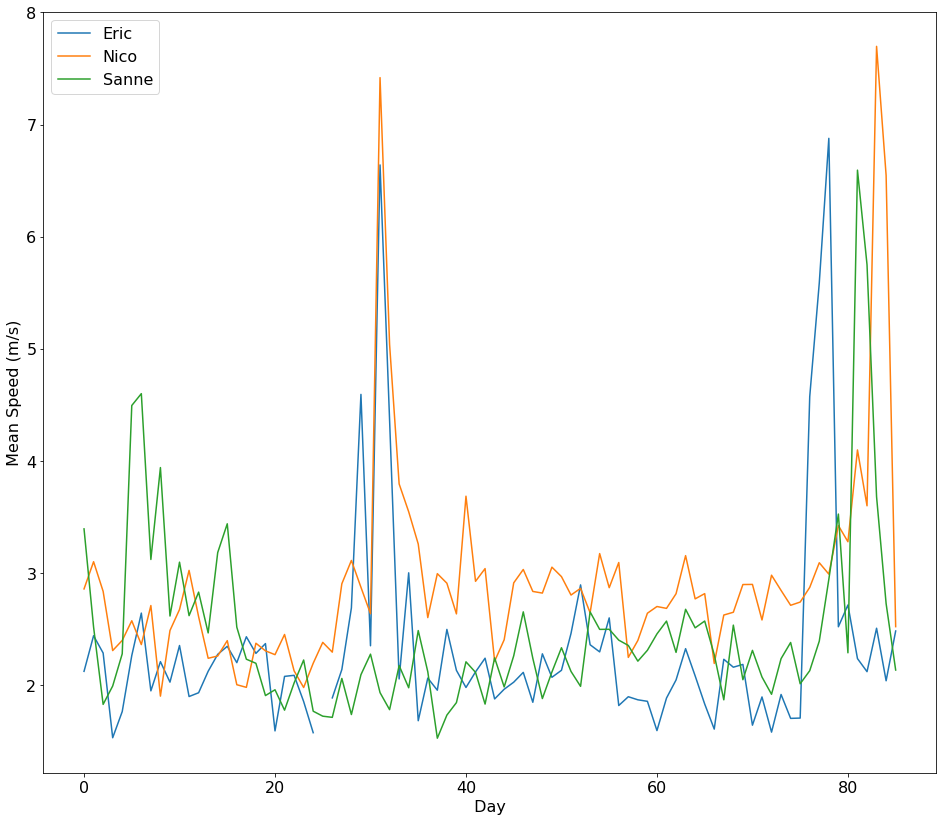

In [15]:
act_data = data_gulls

birddata = pd.read_csv('https://raw.githubusercontent.com/chewbacca13/Visualisation-Project/main/bird_tracking-gulls.csv')
bird_names = pd.unique(birddata.bird_name)  

timestamps = [] 
for k in range(len(birddata)): 
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S")) 
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index) 

for name in bird_names:
    data =  birddata[birddata.bird_name == name]
    times = data.timestamp 
    first_time = times.iloc[0]
    elapsed_time = [time-times.iloc[0] for time in times] 
    elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1) 
  
    next_day = 1
    inds = [] 
    daily_mean_speed = [] 
    for (i,t) in enumerate(elapsed_days): 
        if t < next_day: 
            inds.append(i) 
        else: 
            daily_mean_speed.append(np.mean(data.speed_2d.iloc[inds])) 
            next_day += 3
            inds = [] 
  
    plt.plot(daily_mean_speed, label=name)

plt.legend(loc='best')
plt.xlabel(" Day ") 
plt.ylabel(" Mean Speed (m/s) "); 
plt.show()



In [16]:
from math import sin, cos, sqrt, atan2, radians

def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    return d

In [17]:

if not os.path.exists('data.json'):

    distance = dict()

    s = 0
    for gull in list_gulls:
        row_iterator = gull.iterrows()
        _, last = next(row_iterator)

        for i, row in row_iterator:
            s += getDistanceFromLatLonInKm(last['latitude'], last['longitude'], row['latitude'], row['longitude'])
            last = row

    distance['gulls'] = s/len(list_gulls)

    s = 0
    for stork in list_storks:
        row_iterator = stork.iterrows()
        _, last = next(row_iterator)

        for i, row in row_iterator:
            x = getDistanceFromLatLonInKm(last['location-lat'], last['location-long'], row['location-lat'], row['location-long'])
            if not(math.isnan(x)):
                s += x
            last = row
    distance['storks'] = s/len(list_storks)

    s = 0
    for swallow in list_swallows:
        row_iterator = swallow.iterrows()
        _, last = next(row_iterator)

        for i, row in row_iterator:
            x = getDistanceFromLatLonInKm(last['location-lat'], last['location-long'], row['location-lat'], row['location-long'])
            if not(math.isnan(x)):
                s += x
            last = row

    distance['swallow'] = s/len(list_swallows)

    with open('data.json', 'w') as fp:
        json.dump(distance, fp)


{'gulls': 23018.113988382695,
 'storks': 3060.7210329126196,
 'swallow': 10679.617373616926}

Text(0.5, 1.0, 'The average distance flown of the each spieces.')

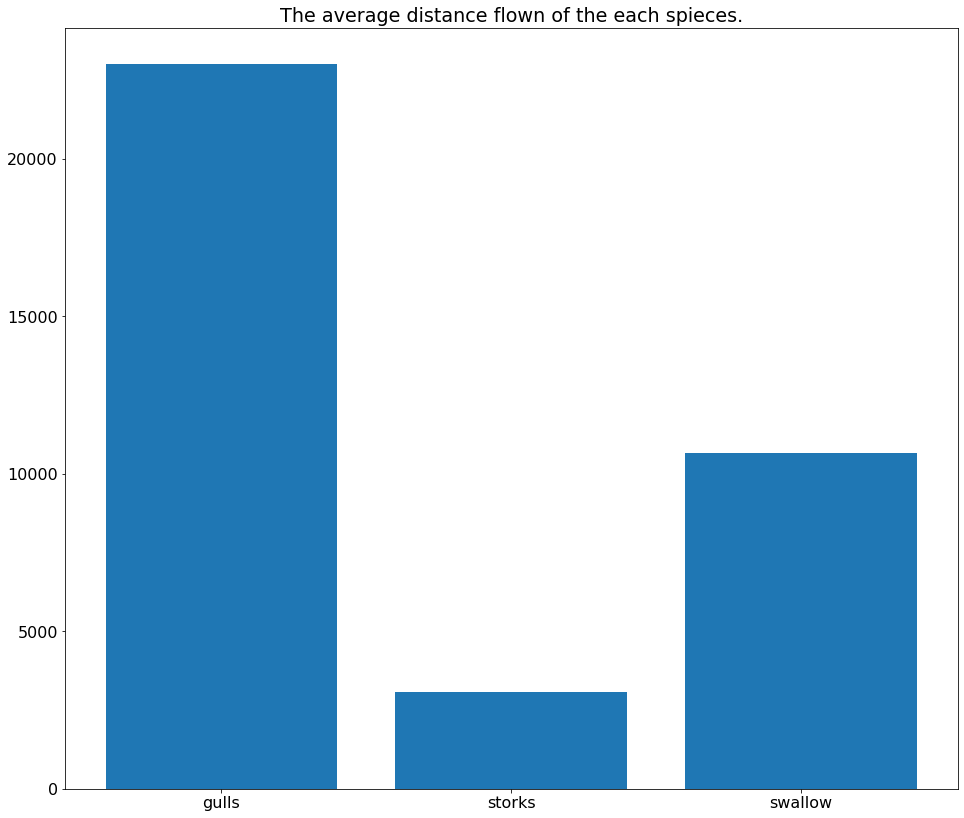

In [63]:
plt.bar(distance.keys(), distance.values())
plt.title("The average distance flown of the each spieces.")

In [18]:
def deg2rad(x):
    return x * pi/180

In [55]:

act_data = data_stork


act_data = act_data[(act_data['heading'] != 0)]
directions = act_data['heading'].dropna()

heading_count = {}
for direct in directions:
    degree = round(direct)
    if degree in heading_count:
        heading_count[degree] += 1
    else:
        heading_count[degree] = 1


data = [[0 for x in range(360)] for y in range(2)] 

for i in range(0, 360):
    data[0][i] = deg2rad(i)
    if i in heading_count:
        data[1][i] = heading_count[i]
    else:
        data[1][i] = 0


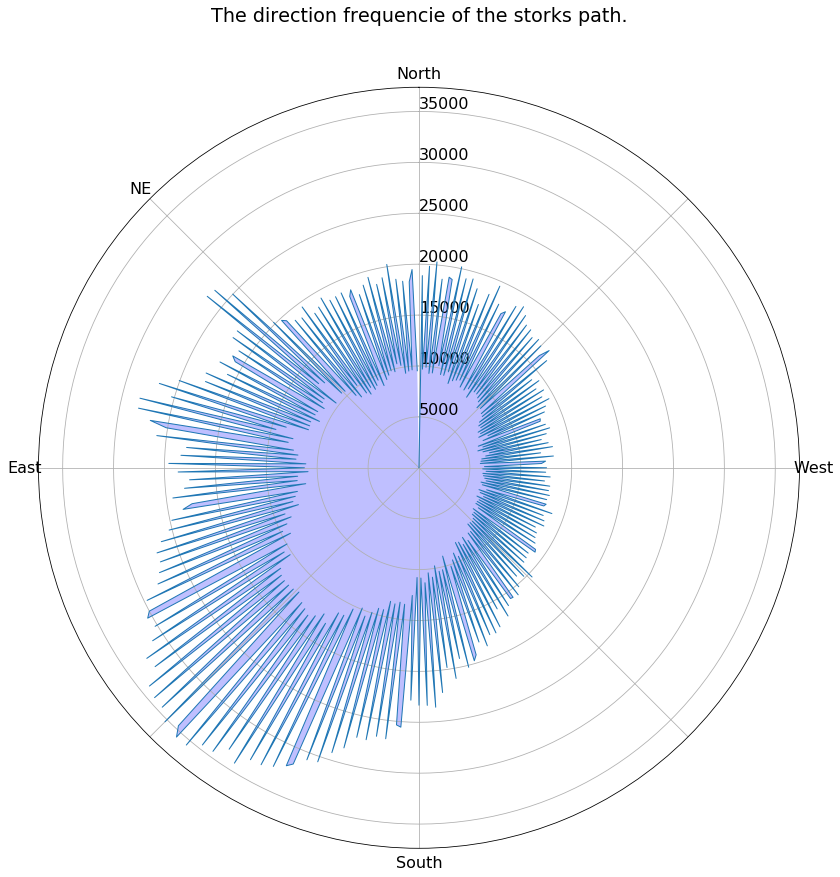

In [73]:
ax = plt.subplot(111, polar=True)
# plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
ax.set_xticklabels(['North', '', 'West', '', 'South', '', 'East', 'NE'])
ax.set_theta_zero_location("N")

ax.plot(data[0], data[1], linewidth=1, linestyle='solid')
ax.fill(data[0], data[1], 'b', alpha = 0.25)
ax.set_theta_direction(-1)
ax.set_title('The direction frequencie of the storks path.\n');